<a href="https://colab.research.google.com/github/FGalvao77/Pipeline-Etapas-de-projeto-de-Machine-Learning/blob/main/%5BPipeline_v2%5D_Etapas_de_projeto_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Pipeline - v2] Etapas de projeto de Machine Learning**

---



## **O que é Machine Learning?**


_Machine Learning aborda a questão de como construir computadores que melhoram automaticamente por meio da **experiência**_ (JORDAN & MITCHELL, 2015).

### **Pipeline**

Nesse notebook será apresentado as etapas principais de um projeto de `Machine Learning`. 

Para exemplo prático utilizaremos o famoso conjunto de dados do _titanic_, onde nosso objetivo é predizer se o passageiro sobreviveu ou não ao trágico acidente dados alguns atributos.

**Etapas de um projeto de Ciência de Dados (Data Science) usando técnicas de Aprendizado de Máquina (Machine Learning)**

1. Bibliotecas;
2. Observação do conjunto de dados;
3. Análise exploratória dos dados;
4. Preparação dos dados;
5. Treinamento do modelo;
6. Avaliação do modelo;
7. Predição;
8. Otimização do modelo;
9. Exportação do modelo e,
10. Reutilização do modelo.

#### **1. Bibliotecas**

In [1]:
# !pip install pandas=='1.2.0'
# !pip install numpy -U

In [2]:
# bibliotecas para análise e processamento dos dados
import pandas as pd
import numpy as np

In [3]:
# !pip install matplotlib -U
# !pip install seaborn -U
# !pip install missingno -U

In [4]:
# bibliotecas para visualização gráfica dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
     
%matplotlib inline
# sns.set() 
# plt.style.use('ggplot')

In [5]:
# importando a biblioteca para ignorar mensagens de "erros"
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
# !pip install sklearn -U

In [7]:
# função para pré-processamento dos dados
from sklearn.preprocessing import StandardScaler

In [8]:
# função para gerar amostras dos dados
from sklearn.model_selection import train_test_split

In [9]:
# função para aprendizado de máquina - classificação
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# funções para avaliação do modelo
from sklearn.metrics import accuracy_score, precision_score

In [11]:
# função para otimização dos hiperparâmetros
from sklearn.model_selection import GridSearchCV

In [12]:
# biblioteca para serialização do modelo 
import pickle

#### **2. Observação do conjunto de dados**

In [13]:
# carregando o conjunto de dados de uma planilha excel (xls) em um dataframe que se encontra em uma url
url = 'https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls'

> Segue o link do site do dataset:
- [Department of Biostatistics - Vanderbilt University School of Medicine](https://biostat.app.vumc.org/wiki/Main/WebHome)

In [14]:
# instalando biblioteca para leitura de arquivos em excel
!pip install xlrd -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [15]:
# realizando a leitura do conjunto de dados 
df = pd.read_excel(url)

In [16]:
# visualizando as 5 primeiras linhas do conjunto de dados
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
# visualizando as 5 últimas linhas do conjunto de dados
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [18]:
# informações gerais do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### **3. Análise exploratória dos dados**

In [19]:
# dimensão do conjunto de dados
df.shape    # linhas e atributos (colunas)

(1309, 14)

In [20]:
# estatística descritiva dos dados
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [21]:
# selecionando um atributo e visualizar seus dados estatísticos
df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [22]:
# selecionando mais que um atributo e visualizando os dados estatísticos
df[['age', 'fare']].describe().T    # com o método ".T" podemos realizar a transposição da exibição dos dados

,count,mean,std,min,25%,50%,75%,max
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292


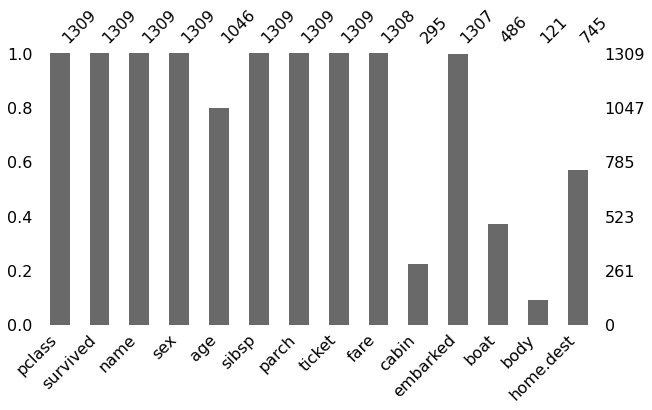

In [23]:
# plotando gráfico de barras com a função ".bar()" da biblioteca "missingno"
msno.bar(df, figsize=(10, 5));

> A biblioteca `MissingNo` permite a visualização de forma gráfica de dados nulos/faltantes no dataset, funciona com datasets tradicionais e também se mostra muito útil para dados como _séries temporais_.

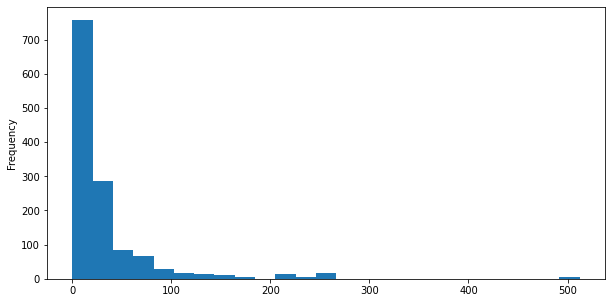

In [24]:
# plotando gráfico de histograma para o atributo "fare" (tarifa)
fig, ax = plt.subplots(figsize=[10, 5])
df['fare'].plot(kind='hist', ax=ax, bins=25)
plt.show();

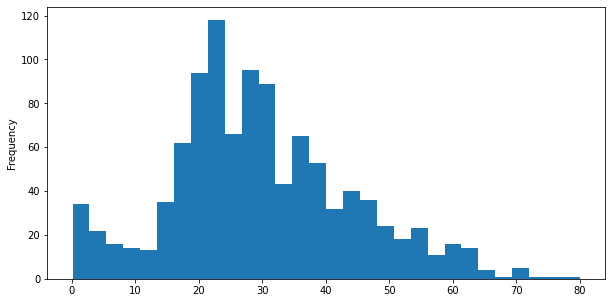

In [25]:
# plotando gráfico de histograma para o atributo "age" (idade)
fig, ax = plt.subplots(figsize=[10, 5])
df['age'].plot(kind='hist', ax=ax, bins=30)
plt.show();

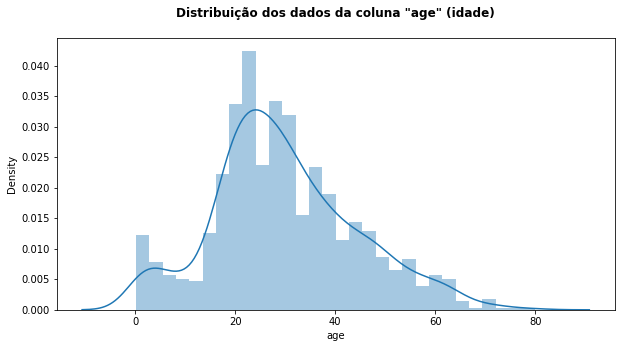

In [26]:
# visualizando a distribuição dos dados da variável "age" (idade)
plt.figure(figsize=(10, 5))
plt.title('Distribuição dos dados da coluna "age" (idade)\n', 
         fontsize = 12, fontweight = 'bold')
sns.distplot(df['age'], bins=30)
plt.show();

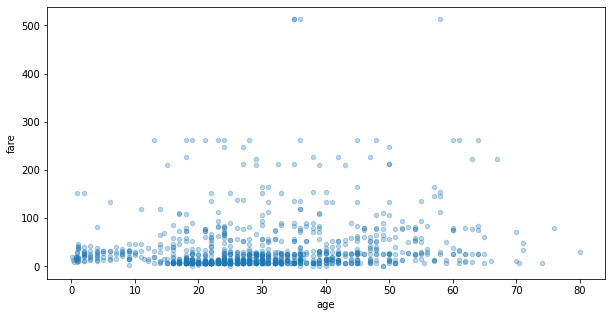

In [27]:
# plotando gráfico de dispersão para age (idade) VS fare (tarifa)
fig, ax = plt.subplots(figsize=[10, 5])
df.plot.scatter(x='age', y='fare', ax=ax, alpha=0.3)
plt.show();

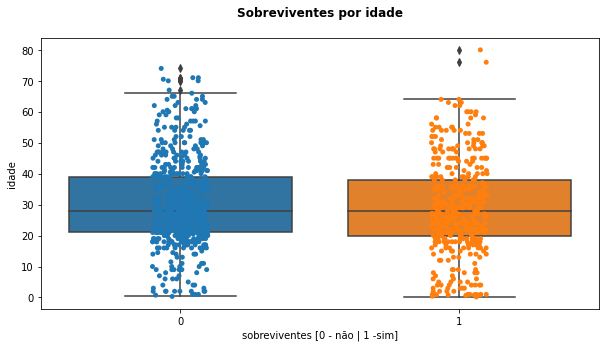

In [28]:
# plotando gráfico de caixa (boxplot) para o atributo "survived" (sobreviventes)
# com um diagrama de dispersão em relação ao atributo "age" (idade)
plt.figure(figsize=[10, 5])
sns.boxplot(x='survived', y='age', data=df)
sns.stripplot(x='survived', y='age', data=df,
              jitter=True, edgecolor='gray')
plt.xlabel('sobreviventes [0 - não | 1 -sim]')
plt.ylabel('idade')

plt.title('Sobreviventes por idade\n', 
         fontsize = 12, fontweight = 'bold')
plt.show();

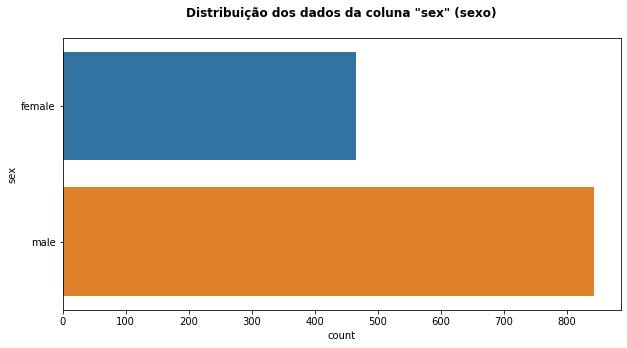

In [29]:
# usando a função ".countplot()" da biblioteca seaborn
# visualizando a distribuição dos dados da variável "sex"
plt.figure(figsize=(10, 5))
plt.title('Distribuição dos dados da coluna "sex" (sexo)\n', 
         fontsize = 12, fontweight = 'bold')
sns.countplot(data=df, y='sex');

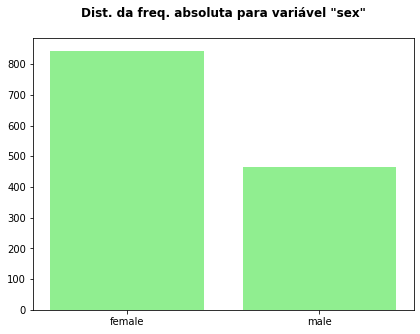

In [30]:
# plotando gráfico das distribuição absoluta da coluna "sex"
plt.figure(figsize=[15, 5])
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
plt.bar(df['sex'].unique(), df['sex'].value_counts(), color = 'lightgreen')
plt.title('Dist. da freq. absoluta para variável "sex"\n', 
          {'fontsize': 12,'fontweight': 'bold'})
plt.show();

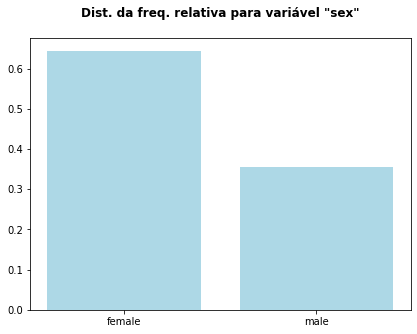

In [31]:
# plotando gráfico das distribuição relativa da coluna "sex"
plt.figure(figsize=[15, 5])
plt.subplot(1,2,2)
plt.bar(df['sex'].unique(), df['sex'].value_counts(normalize=True), color = 'lightblue')
plt.title('Dist. da freq. relativa para variável "sex"\n', 
          {'fontsize': 12,'fontweight': 'bold'})
plt.show();

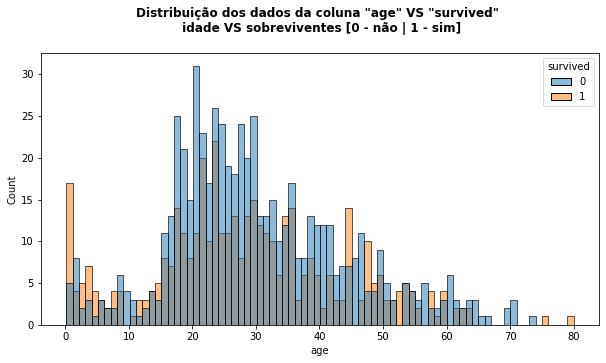

In [32]:
# visualizando a distribuição dos dados da coluna "age" (idade) VS "survived" (sobreviventes)
plt.figure(figsize=(10, 5))
plt.title('Distribuição dos dados da coluna "age" VS "survived" \n idade VS sobreviventes [0 - não | 1 - sim]\n', 
         fontsize = 12, fontweight = 'bold')
sns.histplot(data=df, x='age', hue='survived', bins=80);

In [33]:
# visualizando as instâncias únicas no atributo "survived" (sobreviventes)
df['survived'].unique()

array([1, 0])

In [34]:
# contabilizando as instâncias únicas no atributo "survived" (sobreviventes)
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [35]:
# frequência absoluta e relativa das instâncias únicas no atributo "survived" (sobreviventes)
print(f'Frequência absoluta:\n{df.survived.value_counts()}')
print()
print(f'Frequência relativa:\n{df.survived.value_counts(normalize=True)}')
print()
print(f'Frequência relativa (%):\n{df.survived.value_counts(normalize=True) * 100}')

Frequência absoluta:
0    809
1    500
Name: survived, dtype: int64

Frequência relativa:
0    0.618029
1    0.381971
Name: survived, dtype: float64

Frequência relativa (%):
0    61.802903
1    38.197097
Name: survived, dtype: float64


In [36]:
# visualizando as instâncias únicas dos atributos
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        939
fare          281
cabin         186
embarked        3
boat           28
body          121
home.dest     369
dtype: int64

In [37]:
# correlação entre as variáveis numéricas
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


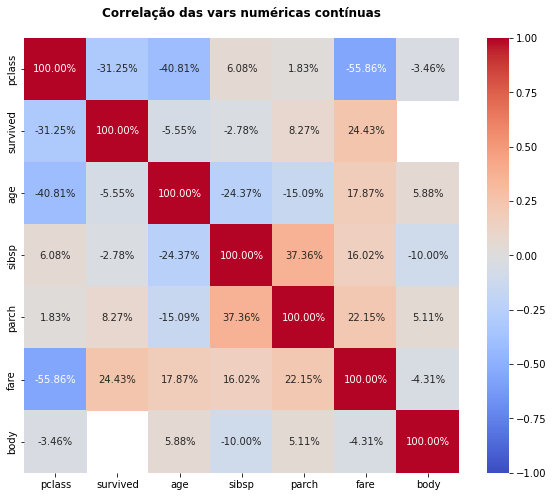

In [38]:
# gráfico de calor das correlações entre as variáveis numéricas
corr = df.corr()

plt.figure(figsize = (10, 8))
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 12,'fontweight': 'bold'})
sns.heatmap(corr, fmt = '0.2%', annot = True, square = True,
            cmap='coolwarm', vmin=-1, vmax=1
            )
plt.show();
# plt.tight_layout();

Vamos instalar a biblioteca `Researchpy` para auxiliar nas análises estatísticas.

_A **Researchpy** produz Pandas DataFrames que contêm informações de teste estatístico relevantes que são normalmente necessárias para pesquisas acadêmicas. As informações são retornadas como DataFrames do Pandas para permitir a exportação rápida e fácil dos resultados para qualquer formato / método que funcione com o DataFrame tradicional do Pandas. O researchpy é essencialmente um wrapper que combina vários pacotes estabelecidos, como pandas, scipy.stats e statsmodels para obter todas as informações padrão exigidas em um método. Se as análises não estivessem disponíveis nesses pacotes, o código foi desenvolvido para preencher a lacuna._

> **Official Page:** https://pypi.org/project/researchpy/

In [39]:
# instalando a biblioteca
!pip install researchpy -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# importando a biblioteca
import researchpy as rp 

In [41]:
# criando uma função para auxiliar na visualização das avaliações estatísticas e das imagens gráficas
def categorical_analysis(data, index, col, figsize=(10, 5)):
    abs_tbl, test = rp.crosstab(data[index], data[col], 
                                test='chi-square', margins=False)
    row_tbl = rp.crosstab(data[index], data[col], prop='row')
    row_tbl = row_tbl.iloc[:-1, :-1]
    
    abs_tbl = abs_tbl.sort_values(('survived', 1))
    row_tbl = row_tbl.sort_values(('survived', 1))
    
    print(test)
    print('\n')
    
    _, ax = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    sns.heatmap(abs_tbl, annot=True, fmt='.5g', cbar=False, cmap='Blues', 
                annot_kws={'fontsize': 20}, ax=ax[0])
    sns.heatmap(row_tbl, annot=True, fmt='.5g', cbar=False, cmap='Greens', 
                annot_kws={'fontsize': 20}, ax=ax[1])
    plt.show();

                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   365.8869
1                    p-value =     0.0000
2               Cramer's phi =     0.5287




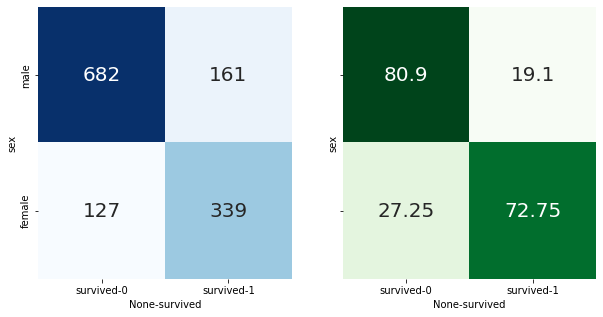

In [42]:
# visualizando a relação entre as colunas "sex" (sexo) e "survived" (sobreviventes)
categorical_analysis(df, 'sex', 'survived', 
                     #figsize=(7, 4)
                     )

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   44.2417
1                    p-value =    0.0000
2                 Cramer's V =    0.1840




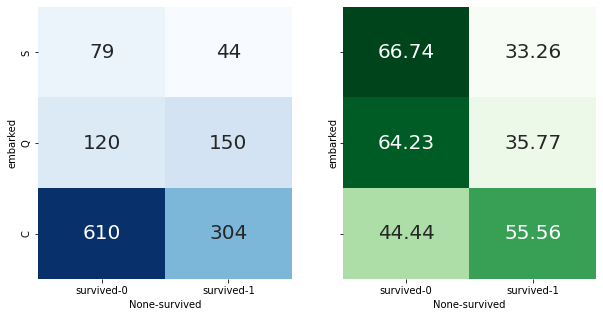

In [43]:
# visualizando a relação entre as colunas "embarked" (local de embarque) e "survived" (sobreviventes)
categorical_analysis(df, 'embarked', 'survived')

                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   127.8592
1                    p-value =     0.0000
2                 Cramer's V =     0.3125




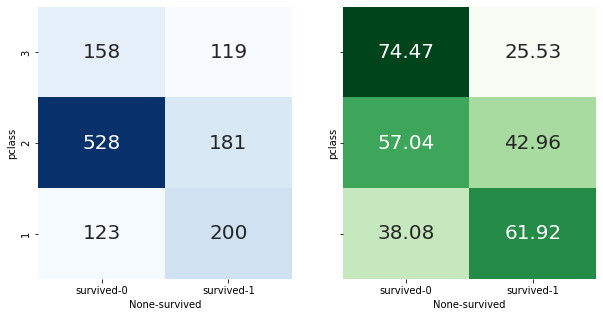

In [44]:
# visualizando a relação entre as colunas "pclass" (tipo da classe) e "survived" (sobreviventes)
categorical_analysis(df, 'pclass', 'survived')

> Diante dos resultados dos testes acima, podemos inferir que **há** fortes evidências estatísticas que as variáveis `sex`, `embarked` e `pclass` explica a nossa variável dependente, nesse caso `survived`.

- o sexo `female` (feminino) teve maior número de sobreviventes;
- local de embarque `Q` e `S` tiveram maior número de não sobreviventes e,
- os passageiros da classe `1` foram os que mais sobreviveram, enquanto o da classe `2` e, principalmente da classe `3` morreram.

#### **4. Preparação dos dados**

In [45]:
# visualizando o nome dos atributos (colunas)
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [46]:
# criando uma cópia do conjunto de dados
df_copia = df.copy()

In [47]:
# removendo atributos pouco ou nada significativos para aprendizagem do modelo
df_copia = df_copia.drop(columns=[
                                  'name',       # nome
                                  'ticket',     # número da passagem
                                  'cabin',      # número da cabine
                                  'boat',       # barco
                                  'body',       # número de identicação do corpo
                                  'home.dest'  # origem/destino
                                ])

In [48]:
# criando variáves "dummy" para os atributos categóricos
df_copia = pd.get_dummies(df_copia, drop_first=True)

In [49]:
# visualizando o conjunto de dados após o tratamento
df_copia.head(10)   # 10 primeiras linhas

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1
5,1,1,48.0000,0,0,26.5500,1,0,1
6,1,1,63.0000,1,0,77.9583,0,0,1
7,1,0,39.0000,0,0,0.0000,1,0,1
8,1,1,53.0000,2,0,51.4792,0,0,1
9,1,0,71.0000,0,0,49.5042,1,0,0


In [50]:
# separando os atributos de entrada e de saída
X = df_copia.drop(columns='survived')   # variáveis explicativas
y = df_copia.survived                   # variável resposta

In [51]:
# particionando os dados aleatoriamente para treino e teste
# 60% para treinamento do modelo e 40% para validação do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=42)

In [52]:
# visualizando as quantidades em cada subconjunto de dados
print('\tX')
print('==================')
print('Treinamento:', len(X_train))
print('Teste:      ', len(X_test))

print('\n\ty')
print('==================')
print('Treinamento:', len(y_train))
print('Teste:      ', len(y_test))

	X
Treinamento: 785
Teste:       524

	y
Treinamento: 785
Teste:       524


In [53]:
# visualizando informações gerais do subconjunto de dados de treino
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 72 to 1126
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      785 non-null    int64  
 1   age         625 non-null    float64
 2   sibsp       785 non-null    int64  
 3   parch       785 non-null    int64  
 4   fare        784 non-null    float64
 5   sex_male    785 non-null    uint8  
 6   embarked_Q  785 non-null    uint8  
 7   embarked_S  785 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 39.1 KB


In [54]:
# contabilizando a quantidade de valores "NaN" no atributo "age" (idade)
X_train['age'].isna().value_counts() 

False    625
True     160
Name: age, dtype: int64

In [55]:
# iremos tratar os valores ausentes imputando uma medida numérica para esse exemplo iremos utilizar a média
media = X_train.mean()
X_train = X_train.fillna(media) 
X_test = X_test.fillna(media)

In [56]:
# visualizando novamente as informações do subconjunto de treino
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 72 to 1126
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      785 non-null    int64  
 1   age         785 non-null    float64
 2   sibsp       785 non-null    int64  
 3   parch       785 non-null    int64  
 4   fare        785 non-null    float64
 5   sex_male    785 non-null    uint8  
 6   embarked_Q  785 non-null    uint8  
 7   embarked_S  785 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 39.1 KB


In [57]:
# contabilizando novamente a quantidade de valores "NaN" no atributo "age" (idade)
X_train['age'].isna().value_counts()

False    785
Name: age, dtype: int64

In [143]:
# realizando a normalização dos atributos numéricos

# instaciando os atributos (colunas)
# cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
#        'embarked_Q', 'embarked_S']
cols = X_train.columns
print(cols)

std_scaler = StandardScaler()

X_train_scal = std_scaler.fit_transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, columns=cols)

# X_test = std_scaler.fit_transform(X_test)
# X_test = pd.DataFrame(X_test, columns=cols)

X_test_scal = std_scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, columns=cols)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')


In [59]:
# visualizando a estatística descritiva do subconjunto de dados de treino
X_train_scal.describe()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
count,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02,7.850000e+02
mean,6.336050e-17,1.674527e-16,3.168025e-17,-5.430900e-17,-2.715450e-17,-2.262875e-18,2.262875e-17,1.493497e-16
std,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00,1.000638e+00
min,-1.548692e+00,-2.356816e+00,-5.043030e-01,-4.194656e-01,-6.270561e-01,-1.350460e+00,-3.297834e-01,-1.511462e+00
25%,-3.603018e-01,-5.820079e-01,-5.043030e-01,-4.194656e-01,-4.771639e-01,-1.350460e+00,-3.297834e-01,-1.511462e+00
50%,8.280886e-01,0.000000e+00,-5.043030e-01,-4.194656e-01,-3.517912e-01,7.404887e-01,-3.297834e-01,6.616109e-01
75%,8.280886e-01,3.934607e-01,4.636135e-01,-4.194656e-01,-3.855869e-02,7.404887e-01,-3.297834e-01,6.616109e-01
max,8.280886e-01,4.132757e+00,7.239029e+00,9.558731e+00,9.098892e+00,7.404887e-01,3.032294e+00,6.616109e-01


#### **5. Treinamento do modelo `KNN`**

In [60]:
# instanciando o modelo "baseline"
knn_baseline = KNeighborsClassifier(n_jobs=-1)

In [61]:
# treinando o modelo com os subconjuntos de treino - X_train_scal e y_train
knn_baseline.fit(X_train_scal, y_train)

KNeighborsClassifier(n_jobs=-1)

#### **6. Avaliação do modelo _baseline_**

In [62]:
# avaliando a acurácia do modelo com os subconjuntos de teste
score_knn = knn_baseline.score(X_test_scal, y_test)
print('Acurácia: %.2f' % score_knn) 

Acurácia: 0.79


#### **7. Predição do modelo _baseline_**

In [63]:
# realizando a predição com os dados de teste
y_pred_knn = knn_baseline.predict(X_test_scal)

In [64]:
# visualizando as predições
y_pred_knn

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [65]:
# avaliando o modelo sobre os dados de teste utilizando a métrica de acurácia (0-1)
# para isso, utilizaremos a função "accuracy_score"
acc_knn = accuracy_score(y_test, y_pred_knn)
print('Acurácia: %.2f' % acc_knn)

Acurácia: 0.79


In [66]:
# avaliando o modelo sobre os dados de teste utilizando a métrica de precisão (0-1)
# para isso, utilizaremos a função "precision_score"
prec_knn = precision_score(y_test, y_pred_knn)
print('Precisão: %.2f' % prec_knn)

Precisão: 0.78


In [67]:
# importando a função para gerar um relatório das metricas 
# e plotar a matriz de confusão
from sklearn.metrics import classification_report, plot_confusion_matrix

In [68]:
# iremos criar uma função para otimizar a aplicação do modelo 
# e a exibição do relatório e da matriz de confusão
def classification_results(classifier, X_test, y_test, y_pred, cmap='Blues'):
    print('Resultados do modelo:', classifier.__class__.__name__)
    
    y_pred = classifier.predict(X_test_scal)
    
    print(classification_report(y_test, y_pred))
    
    plot_confusion_matrix(classifier, X_test_scal, y_test, cmap=cmap);

Resultados do modelo: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       309
           1       0.78      0.67      0.72       215

    accuracy                           0.79       524
   macro avg       0.79      0.77      0.78       524
weighted avg       0.79      0.79      0.78       524



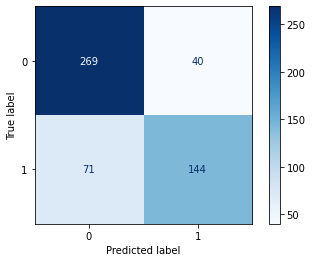

In [69]:
# aplicando a função criada e passando como argumentos o modelo 
# e as bases de testes - "X_test" e "y_test"
classification_results(knn_baseline, X_test_scal, y_test, y_pred_knn)

#### **8. Otimização do modelo _baseline_**

In [70]:
# visualizando a documentação
?KNeighborsClassifier

In [71]:
# imprimindo os parâmetros
print(KNeighborsClassifier().get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [72]:
# otimização dos hiperparâmetros do modelo K-NN
params_knn = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algoritmos para computar as distâncias
    'leaf_size': [int(x) for x in np.linspace(start=30, stop=100, num=15)],
    'metric': ['minkowski', 'euclidean'],
    'n_neighbors': list(range(2, 6)),                        # número de vizinhos
    'p': [1, 2],                                             # métrica de distância (manhattan = 1 | euclidiana = 2)
    'weights': ['uniform', 'distance'],                      # função de pesos para predição
}

params_knn

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
 'metric': ['minkowski', 'euclidean'],
 'n_neighbors': [2, 3, 4, 5],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [73]:
# definindo a busca em grade para o processo de otimização
clf_baseline = GridSearchCV(estimator=knn_baseline, param_grid=params_knn, 
                   cv=10, verbose=2, n_jobs=-1)

# visualizando os hiperparâmetros
clf_baseline

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                       80, 85, 90, 95, 100],
                         'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [74]:
# executando o método de busca para todos os conjuntos de hiperparâmetros
best_model_knn = clf_baseline.fit(X_train_scal, y_train)
best_model_knn

Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                       80, 85, 90, 95, 100],
                         'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [75]:
# visualizando o melhor hiperparâmetro
best_model_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

In [76]:
# visualizando os melhores estimadores
best_model_knn.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, p=1)

In [77]:
# instanciando o modelo com os melhores parâmetros
knn_bestParams = best_model_knn.best_estimator_
knn_bestParams

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, p=1)

In [78]:
# treinando o modelo com os subconjuntos de treino - X_train_scal e y_train
knn_bestParams.fit(X_train_scal, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, p=1)

In [79]:
# avaliando a acurácia do modelo com os subconjuntos de teste
score_knn2 = knn_bestParams.score(X_test_scal, y_test)
print('Acurácia: %.2f' % score_knn2)

Acurácia: 0.76


In [80]:
# realizando a predição com os dados de teste
y_pred_knn2 = knn_bestParams.predict(X_test_scal)

Resultados do modelo: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       309
           1       0.75      0.63      0.68       215

    accuracy                           0.76       524
   macro avg       0.76      0.74      0.75       524
weighted avg       0.76      0.76      0.76       524



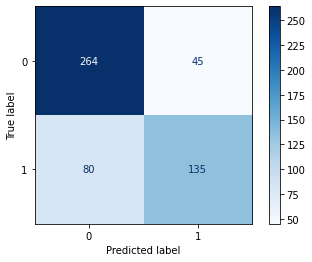

In [81]:
# aplicando a função criada e passando como argumentos o modelo 
# e as bases de testes - "X_test_scal" e "y_test"
classification_results(knn_bestParams, X_test_scal, y_test, y_pred_knn2)

### **[EXTRA] 5. Treinamento do modelo `Random Forest`**

In [82]:
# importando a função
from sklearn.ensemble import RandomForestClassifier

In [83]:
# instanciando o modelo
model_randFor = RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)

In [84]:
# treinando o modelo com os subconjuntos de treino - X_train_scal e y_train
model_randFor.fit(X_train_scal, y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=0)

#### **[EXTRA] 6. Avaliação do segundo modelo**

In [85]:
# avaliando a acurácia do modelo com os subconjuntos de teste
score_randFor = model_randFor.score(X_test_scal, y_test)
print('Acurácia: %.2f' % score_randFor) 

Acurácia: 0.79


#### **[EXTRA] 7. Predição do segundo modelo**

In [86]:
# realizando a predição com os dados de teste
y_pred_randFor = model_randFor.predict(X_test_scal)

In [87]:
# visualizando as predições
y_pred_randFor

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [88]:
# avaliando o modelo sobre os dados de teste utilizando a métrica de acurácia (0-1)
# para isso, utilizaremos a função "accuracy_score"
acc_randFor = accuracy_score(y_test, y_pred_randFor)
print('Acurácia: %.2f' % acc_randFor)

Acurácia: 0.79


In [89]:
# avaliando o modelo sobre os dados de teste utilizando a métrica de precisão (0-1)
# para isso, utilizaremos a função "precision_score"
prec_randFor = precision_score(y_test, y_pred_randFor)
print('Precisão: %.2f' % prec_randFor)

Precisão: 0.80


Resultados do modelo: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       309
           1       0.80      0.67      0.73       215

    accuracy                           0.79       524
   macro avg       0.79      0.78      0.78       524
weighted avg       0.79      0.79      0.79       524



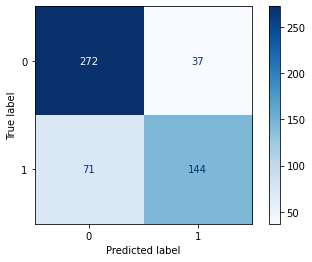

In [90]:
# aplicando a função criada e passando como argumentos o modelo 
# e as bases de testes - "X_test_scal" e "y_test"
classification_results(model_randFor, X_test_scal, y_test, y_pred_randFor)

#### **[EXTRA] 8. Otimização do segundo modelo**

In [91]:
# imprimindo os parâmetros
print(RandomForestClassifier().get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [93]:
# bootstrap = [True, False]
# criterion = ['gini', 'entropy']
# max_depth = [2, 6]
# max_features = ['auto', 'sqrt']
# min_samples_leaf = [2, 5]
# min_samples_split = [2, 5]
# n_estimators = [int(x) for x in np.linspace(start=100, stop=1_000, num=5)]

# params_randFor = {
#     'bootstrap': bootstrap,
#     'criterion': criterion, 
#     'max_depth': max_depth,
#     'max_features': max_features,
#     'min_samples_leaf': min_samples_leaf, 
#     'min_samples_split': min_samples_split,
#     'n_estimators': n_estimators
# }

# criando um dicionário com os parâmetros instanciados do "Random Forest"
params_randFor = {
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': [int(x) for x in np.linspace(start=2, stop=20, num=9)], 
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf':[int(x) for x in np.linspace(start=5, stop=100, num=50)], 
    'min_samples_split': [int(x) for x in np.linspace(start=5, stop=10, num=50)], 
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=1_000, num=100)]
}

# params_randFor

In [94]:
# instanciando o modelo
model_randFor2 = RandomForestClassifier(n_jobs=-1, random_state=0)
model_randFor2

RandomForestClassifier(n_jobs=-1, random_state=0)

In [95]:
# importando função para otimização dos hiperparâmetrsp
from sklearn.model_selection import RandomizedSearchCV

In [96]:
# visualizando a documentação
?RandomizedSearchCV

In [97]:
# instanciando o "search"
randSearch_randFor = RandomizedSearchCV(
    estimator=model_randFor2, param_distributions=params_randFor, 
    cv=10, random_state=0, n_jobs=-1
)

In [98]:
# treinando o "search" com os dados de treino
best_model_randFor = randSearch_randFor.fit(X_train_scal, y_train)

In [99]:
# visualizando os melhores hiperparâmetros
best_model_randFor.best_params_

{'n_estimators': 88,
 'min_samples_split': 5,
 'min_samples_leaf': 88,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'gini',
 'class_weight': 'balanced',
 'bootstrap': True}

In [100]:
# instanciando o modelo com os melhores parâmetros
randFor_bestParams = best_model_randFor.best_estimator_
randFor_bestParams

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='log2', min_samples_leaf=88,
                       min_samples_split=5, n_estimators=88, n_jobs=-1,
                       random_state=0)

In [101]:
# treinando o modelo com os subconjuntos de treino - X_train_scal e y_train
randFor_bestParams.fit(X_train_scal, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='log2', min_samples_leaf=88,
                       min_samples_split=5, n_estimators=88, n_jobs=-1,
                       random_state=0)

In [102]:
# avaliando a acurácia do modelo com os subconjuntos de teste
score_randFor2 = randFor_bestParams.score(X_test_scal, y_test)
print('Acurácia: %.2f' % score_randFor2) 

Acurácia: 0.77


In [103]:
# realizando a predição com os dados de teste
y_pred_randFor2 = randFor_bestParams.predict(X_test_scal)

Resultados do modelo: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       309
           1       0.74      0.70      0.72       215

    accuracy                           0.77       524
   macro avg       0.77      0.76      0.76       524
weighted avg       0.77      0.77      0.77       524



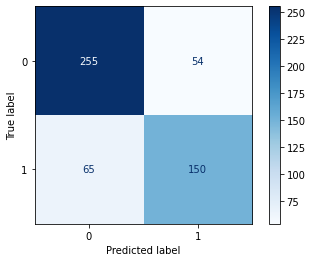

In [104]:
# aplicando a função criada e passando como argumentos o modelo 
# e as bases de testes - "X_test" e "y_test"
classification_results(randFor_bestParams, X_test_scal, y_test, y_pred_randFor2)

#### **[EXTRA] 5. Treinamento do modelo `Light GBM` e `XG Boost`**

In [105]:
# importando as funções
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [106]:
# instanciando os modelos
model_lightGBM = LGBMClassifier(n_estimators=250, random_state=0, n_jobs=-1)
model_XGB = XGBClassifier(n_estimators=250, random_state=0, n_jobs=-1)

In [107]:
# treinando os modelos com os subconjuntos de treino - X_train_scal e y_train
print(
    model_lightGBM.fit(X_train_scal, y_train),
    model_XGB.fit(X_train_scal, y_train), 
    sep='\n'
)

LGBMClassifier(n_estimators=250, random_state=0)
XGBClassifier(n_estimators=250, n_jobs=-1)


#### **[EXTRA] 6. Avaliação dos modelos**

In [108]:
# avaliando a acurácia do modelo com os subconjuntos de teste
score_lgbm = model_lightGBM.score(X_test_scal, y_test)
score_xgb = model_XGB.score(X_test_scal, y_test)

print('Acurácia [Light GBM]: %.2f' % score_lgbm) 
print('Acurácia [XG Boost]: %.2f' % score_xgb) 

Acurácia [Light GBM]: 0.78
Acurácia [XG Boost]: 0.80


#### **[EXTRA] 7. Predição dos modelos**

In [109]:
# realizando a predição com os dados de teste
y_pred_lgbm = model_lightGBM.predict(X_test_scal)
y_pred_xgb = model_XGB.predict(X_test_scal)

In [110]:
# avaliando o modelo sobre os dados de teste utilizando a métrica de acurácia (0-1)
# para isso, utilizaremos a função "accuracy_score"
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print('Acurácia [Light GBM]: %.2f' % acc_lgbm)
print('Acurácia [XG Boost]: %.2f' % acc_xgb)

Acurácia [Light GBM]: 0.78
Acurácia [XG Boost]: 0.80


In [111]:
# avaliando o modelo sobre os dados de teste utilizando a métrica de precisão (0-1)
# para isso, utilizaremos a função "precision_score"
prec_lgbm = precision_score(y_test, y_pred_lgbm)
prec_xgb = precision_score(y_test, y_pred_xgb)

print('Precisão [Light GBM]: %.2f' % prec_lgbm)
print('Precisão [XG Boost]: %.2f' % prec_xgb)

Precisão [Light GBM]: 0.78
Precisão [XG Boost]: 0.82


Resultados do modelo: LGBMClassifier
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       309
           1       0.78      0.65      0.71       215

    accuracy                           0.78       524
   macro avg       0.78      0.76      0.77       524
weighted avg       0.78      0.78      0.78       524



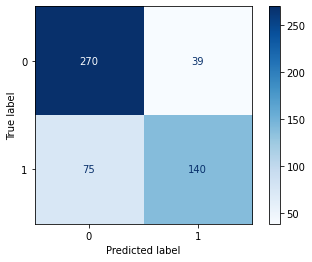

In [112]:
# aplicando a função criada e passando como argumentos o modelo 
# e as bases de testes - "X_test" e "y_test"
classification_results(model_lightGBM, X_test_scal, y_test, y_pred_lgbm)

Resultados do modelo: XGBClassifier
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       309
           1       0.82      0.64      0.72       215

    accuracy                           0.80       524
   macro avg       0.80      0.77      0.78       524
weighted avg       0.80      0.80      0.79       524



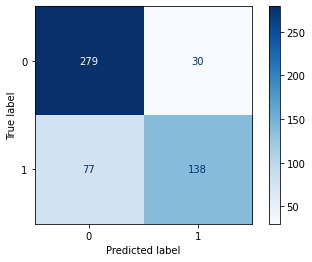

In [113]:
# aplicando a função criada e passando como argumentos o modelo 
# e as bases de testes - "X_test" e "y_test"
classification_results(model_XGB, X_test_scal, y_test, y_pred_xgb)

#### **[EXTRA] 8. Otimização dos modelos**

In [114]:
# visualizando os parâmetros dos modelos
print(LGBMClassifier().get_params().keys())
print(XGBClassifier().get_params().keys())

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])
dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


In [115]:
# visualizando a documentação
?LGBMClassifier

In [116]:
# visualizando a documentação
XGBClassifier

In [117]:
# importando funções matemáticas
from scipy.stats import uniform, randint

In [118]:
# instanciando os parâmetros do "Light GBM"
boosting_type = ['gbdt', 'dart', 'goss', 'rf']
colsample_bytree = uniform(0.9, 0.2)
learning_rate = uniform(0.03, 0.9)
max_depth = randint(2, 6)
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_leaves = [int(x) for x in np.linspace(start=30, stop=100, num=35)]
n_estimators = [int(x) for x in np.linspace(start=100, stop=1_000, num=100)]

In [119]:
# criando um dicionário com os parâmetros instanciados do "Light GBM"
params_lgbm = {
    'boosting_type': boosting_type,
    'colsample_bytree': colsample_bytree,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'subsample': subsample,
    'num_leaves': num_leaves, 
    'n_estimators': n_estimators
}

In [120]:
# criando um dicionário com os parâmetros instanciados do "Light GBM"
params_xgb = {
    'learning_rate': uniform(0.03, 0.9),
    'n_estimators': randint(100, 1_500),
    'max_depth': randint(2, 6),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.9, 0.2),
    'colsample_bytree': uniform(0.9, 0.2), 
    # gpu_id='0',           # parâmetro para utilizar a gpu do colab
    # tree_method='exact'   
}

params_xgb

{'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f94e1efa250>,
 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f94e1b5bdd0>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f94e0ed9110>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f94e1c31c90>,
 'subsample': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f94e1e3af50>,
 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f94e1e3ad90>}

In [121]:
# instanciando os modelos
model_lightGBM2 = LGBMClassifier(n_estimators=250, random_state=0, n_jobs=-1)
model_XGB2 = XGBClassifier(n_estimators=250, random_state=0, n_jobs=-1)

In [122]:
# instanciando o "search" com os hiperparâmtros dos modelos
randSearch_lightGBM = RandomizedSearchCV(
    estimator=model_lightGBM2, param_distributions=params_lgbm, 
    cv=10, random_state=0, n_jobs=-1
)

randSearch_XGB = RandomizedSearchCV(
    estimator=model_XGB2, param_distributions=params_xgb, 
    cv=10, random_state=0, n_jobs=-1
)

In [123]:
# treinando o modelo "Light GBM"
best_model_lightGBM = randSearch_lightGBM.fit(X_train_scal, y_train)

In [124]:
# treinando o modelo "XG Boost"
best_model_XGB = randSearch_XGB.fit(X_train_scal, y_train)

In [125]:
# visualizando os melhores hiperparâmetros do modelo "Light GBM"
best_model_lightGBM.best_params_

{'boosting_type': 'dart',
 'colsample_bytree': 0.97687634145854,
 'learning_rate': 0.297781145890025,
 'max_depth': 2,
 'n_estimators': 900,
 'num_leaves': 54,
 'subsample': 0.2}

In [126]:
# visualizando os melhores hiperparâmetros do modelo "XG Boost"
best_model_XGB.best_params_

{'colsample_bytree': 0.9286706574818093,
 'gamma': 0.47233445852479194,
 'learning_rate': 0.49966348957506457,
 'max_depth': 2,
 'n_estimators': 251,
 'subsample': 0.9529111224209255}

In [127]:
# instanciando os melhores hiperparâmetros do modelo "Light GBM"
lightGBM_bestParams = best_model_lightGBM.best_estimator_
lightGBM_bestParams

LGBMClassifier(boosting_type='dart', colsample_bytree=0.97687634145854,
               learning_rate=0.297781145890025, max_depth=2, n_estimators=900,
               num_leaves=54, random_state=0, subsample=0.2)

In [128]:
# instanciando os melhores hiperparâmetros do modelo "XG Boost"
XGB_bestParams = best_model_XGB.best_estimator_
XGB_bestParams

XGBClassifier(colsample_bytree=0.9286706574818093, gamma=0.47233445852479194,
              learning_rate=0.49966348957506457, max_depth=2, n_estimators=251,
              n_jobs=-1, subsample=0.9529111224209255)

In [129]:
# treinando o modelo "Light GBM"
lightGBM_bestParams.fit(X_train_scal, y_train)

LGBMClassifier(boosting_type='dart', colsample_bytree=0.97687634145854,
               learning_rate=0.297781145890025, max_depth=2, n_estimators=900,
               num_leaves=54, random_state=0, subsample=0.2)

In [130]:
# treinando o modelo "XG Boost"
XGB_bestParams.fit(X_train_scal, y_train)

XGBClassifier(colsample_bytree=0.9286706574818093, gamma=0.47233445852479194,
              learning_rate=0.49966348957506457, max_depth=2, n_estimators=251,
              n_jobs=-1, subsample=0.9529111224209255)

In [131]:
# realizando as predições com o modelo
y_pred_lgbm2 = lightGBM_bestParams.predict(X_test_scal)
y_pred_xgb2 = XGB_bestParams.predict(X_test_scal)

In [132]:
# avaliando acurácia dos modelos
acc_lgbm2 = accuracy_score(y_test, y_pred_lgbm2)
acc_xgb2 = accuracy_score(y_test, y_pred_xgb2)

print('Acurácia [Light GBM v2]: %.2f' % acc_lgbm2)
print('Acurácia [XG Boost v2]: %.2f' % acc_xgb2)

Acurácia [Light GBM v2]: 0.79
Acurácia [XG Boost v2]: 0.78


Resultados do modelo: LGBMClassifier
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       309
           1       0.84      0.60      0.70       215

    accuracy                           0.79       524
   macro avg       0.80      0.76      0.77       524
weighted avg       0.80      0.79      0.78       524



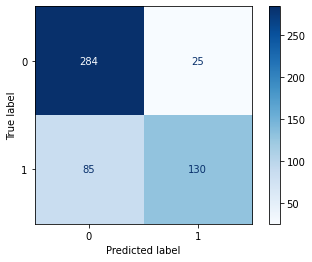

In [133]:
# visualizando os resultados do modelo "Light GBM"
classification_results(lightGBM_bestParams, X_test_scal, y_test, y_pred_lgbm2)

Resultados do modelo: XGBClassifier
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       309
           1       0.78      0.66      0.72       215

    accuracy                           0.78       524
   macro avg       0.78      0.77      0.77       524
weighted avg       0.78      0.78      0.78       524



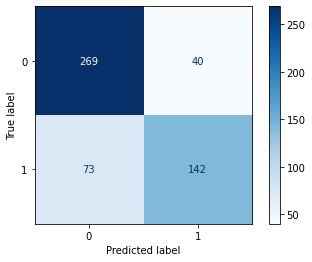

In [134]:
# visualizando os resultados do modelo "XG Boost"
classification_results(XGB_bestParams, X_test_scal, y_test, y_pred_xgb2)

#### **9. Exportação do modelo**

In [135]:
# salvando o modelo escolhido em um arquivo
pickle.dump(best_model_lightGBM.best_estimator_, 
            open('model_LightGBM.sav', mode='wb'))  # "wb" - write binary

#### **10. Reutilização do modelo**

In [136]:
# instanciando o modelo no objeto "arquivo"
archive = open('model_LightGBM.sav', mode='rb')    # "rb" - read binary

# realizando a leitura do modelo
model_final = pickle.load(archive)
print(model_final)   # visualizando o modelo

LGBMClassifier(boosting_type='dart', colsample_bytree=0.97687634145854,
               learning_rate=0.297781145890025, max_depth=2, n_estimators=900,
               num_leaves=54, random_state=0, subsample=0.2)


In [137]:
# realizando a predição com o modelo
y_pred_modelFinal = model_final.predict(X_test_scal)
y_pred_modelFinal  # visualizando as predições

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [138]:
# visualizando a acurácia do modelo
model_final.score(X_test_scal, y_pred_modelFinal)

1.0

Resultados do modelo: LGBMClassifier
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       309
           1       0.84      0.60      0.70       215

    accuracy                           0.79       524
   macro avg       0.80      0.76      0.77       524
weighted avg       0.80      0.79      0.78       524



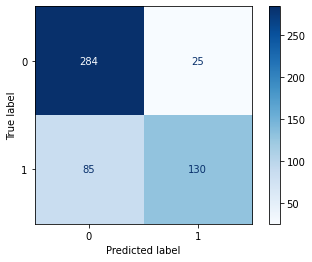

In [139]:
# visualizando os resultados do modelo final
classification_results(model_final, X_test_scal, y_test, y_pred_modelFinal)

In [140]:
# visualizando a versão do Python utilizado neste notebook
from platform import python_version

print(f'Versão Python: {python_version()}')

Versão Python: 3.7.14


In [141]:
# instalando a biblioteca "watermark"
!pip install watermark -U
# esse pacote é usado para gravar as versões dos pacotes usados neste notebook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 20.6 MB/s 


In [142]:
# versões das bibliotecas utilizadas neste notebook
%reload_ext watermark
%watermark -a 'Fernando Galvão | (Pipeline) Etapas de projeto de Machine Learning #20/11/2021' --iversions

Author: Fernando Galvão | (Pipeline) Etapas de projeto de Machine Learning #20/11/2021

missingno : 0.5.1
researchpy: 0.3.5
pandas    : 1.3.5
seaborn   : 0.11.2
numpy     : 1.21.6
matplotlib: 3.2.2

